### IS727272 - Cordero Hernández, Marco Ricardo

# M3_2 Limpieza de Datasets, Marketing

Es una serie de clientes de un banco que se pretende segmentar por grupos. En este caso no tenemos salida Y, sólo nuestra matriz de features que deberemos limpiar y escalar al final.

## 1. Leer el dataset y desplegar la información

In [1]:
#Importar las librerías que usaremos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
#Leer dataset
mkt_ds = pd.read_csv('./Datasets/Marketing_data.csv')
mkt_ds

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Descripción de los features

- CUSTID: Identificación del titular de la tarjeta de crédito
- BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
- BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
- PURCHASES: Cantidad de compras realizadas desde la cuenta
- ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
- INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
- CASH_ADVANCE: Anticipo otorgado al usuario
- PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
- PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
- ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
- PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
- CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
- CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
- PURCHASES_TRX: número de transacciones de compras realizadas
- CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
- PAYMENTS: Número de pagos realizados por el usuario
- MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
- PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
- TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

In [3]:
#Revisar si tiene datos nulos
if (mkt_ds.isnull().values.any()):
    print("El dataset tiene datos nulos")

El dataset tiene datos nulos


In [4]:
#Entender los datos promedios del dataset
mkt_ds.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
#Hacer tus anotaciones de acuerdo a los promedios que se despliegan

print('''
    El promedio del balance de los clientes es alrededor de 1564.5
    La actualización del balance usualmente es frecuente
    La frecuencia de compra es casi promedio, es decir, está balanceada al 49%
''')


    El promedio del balance de los clientes es alrededor de 1564.5
    La actualización del balance usualmente es frecuente
    La frecuencia de compra es casi promedio, es decir, está balanceada al 49%



In [6]:
#Vamos a investigar quién ha hecho una compra de 40761(.25) en 'ONEOFF_PURCHASES'
mkt_ds.loc[mkt_ds['ONEOFF_PURCHASES'] == max(mkt_ds['ONEOFF_PURCHASES'])]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
#Cuánto es el monto máximo de 'CASH_ADVANCE'
max(mkt_ds['CASH_ADVANCE'])

47137.21176

In [8]:
#Vamos a ver quien pagó por anticipado ese monto máximo en 'CASH_ADVANCE'
mkt_ds.loc[mkt_ds['CASH_ADVANCE'] == max(mkt_ds['CASH_ADVANCE'])]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# 2. Visualización del Dataset y asignar valores a los datos faltantes

<AxesSubplot:>

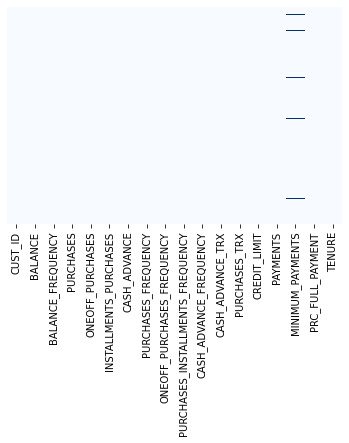

In [9]:
#Comprobemos si tenemos datos faltantes gráficamente
# mkt_ds.info() # para información analítica
sns.heatmap(mkt_ds.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

In [10]:
#Contar cuántos datos nulos tenemos en cada columna
mkt_ds.isna().sum(axis = 0)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
#Vamos a rellenar los datos faltantes con el promedio del feature 'MINIMUM_PAYMENTS'
mkt_ds['MINIMUM_PAYMENTS'].fillna(value = mkt_ds['MINIMUM_PAYMENTS'].mean(), inplace = True)

In [12]:
#Vamos a rellenar los datos faltantes con el promedio del feature 'CREDIT_LIMIT'
mkt_ds['CREDIT_LIMIT'].fillna(value = mkt_ds['CREDIT_LIMIT'].mean(), inplace = True)

<AxesSubplot:>

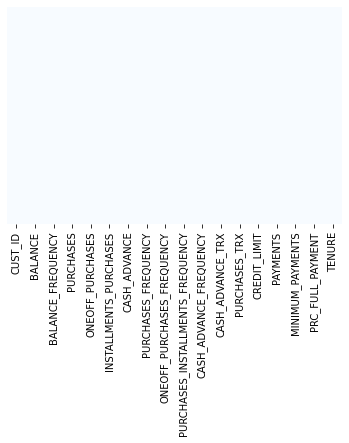

In [13]:
#Comprobemos otra vez si tenemos datos faltantes de forma gráfica
sns.heatmap(mkt_ds.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

In [14]:
# Verifiquemos si tenemos entradas duplicadas en nuestros datos 
mkt_ds.duplicated(keep = 'last')

0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Length: 8950, dtype: bool

In [15]:
# Borar el feature 'CUST_ID'
mkt_ds.drop('CUST_ID', axis = 1, inplace = True)

In [16]:
mkt_ds.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
#Contar el número de columnas
len(mkt_ds.columns)

17

<AxesSubplot:>

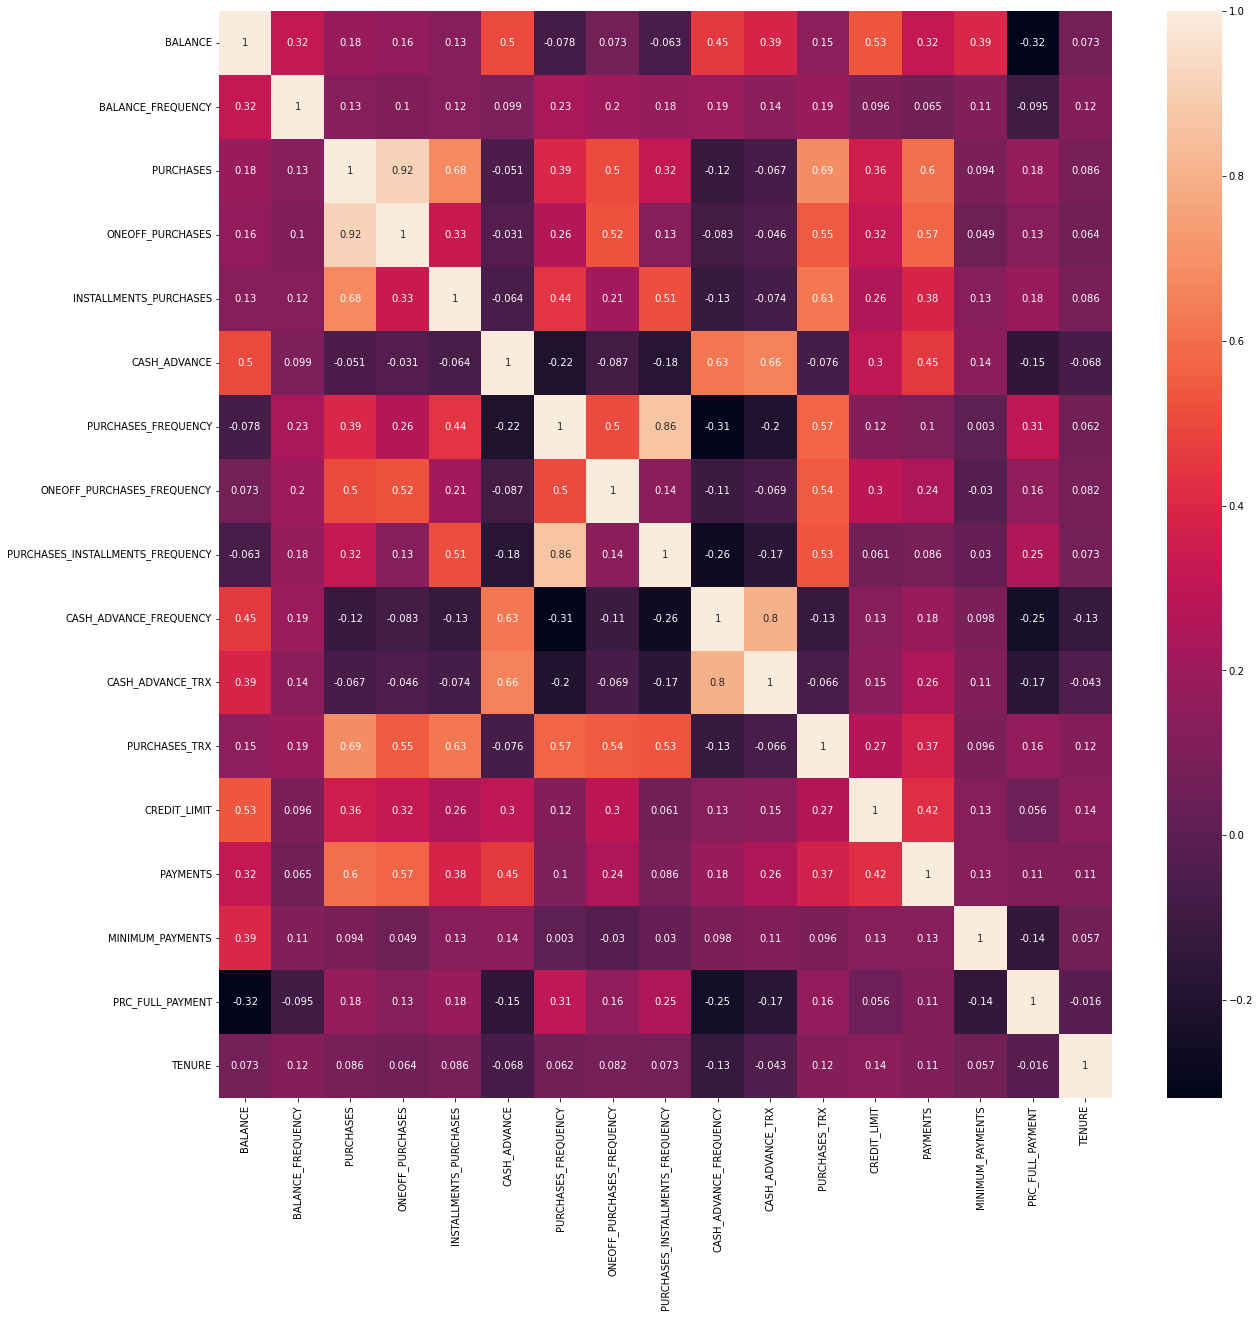

In [18]:
#Obtener la matriz de correlaciones  y su gráfica de heatmaps

correlations = mkt_ds.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

# 3. Escalar el dataset y obtener la matriz X

In [19]:
#Escalar el dataset utilizando la función Standard Scaler
X = StandardScaler()
X.fit_transform(mkt_ds)

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])